# Efecto de la Corrección de Etiquetas

In [1]:
import pycaret
pycaret.__version__

'3.3.2'

In [2]:
import pandas as pd
from pycaret.classification import *

## Desempeño previo

In [179]:
dataset = pd.read_csv("output_file_50mfcc_4000Hz_CLEANby50MFCC.csv")
dataset = dataset.drop(columns=['file name', 'label_updated'])

dataset_test = pd.read_csv("testoutput_file_50mfcc_4000Hz_CLEANby50MFCC.csv")
dataset_test = dataset_test.drop(columns=['file name', 'label_updated'])

In [157]:
s = setup(data=dataset, test_data=dataset_test, index=False, target = 'label', session_id = 123,
          remove_outliers=True, fix_imbalance=True, normalize=True)

,Description,Value
0,Session id,123
1,Target,label
2,Target type,Multiclass
3,Original data shape,"(5973, 51)"
4,Transformed data shape,"(9924, 51)"
5,Transformed train set shape,"(8120, 51)"
6,Transformed test set shape,"(1804, 51)"
7,Numeric features,50
8,Preprocess,True
9,Imputation type,simple


In [158]:
# con preprocesamiento, normalizado, remoción de outliers, SMOTE
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
catboost,CatBoost Classifier,0.8222,0.9634,0.8222,0.8442,0.8196,0.7345,0.7431,4.4010
xgboost,Extreme Gradient Boosting,0.8042,0.9573,0.8042,0.8249,0.7997,0.7045,0.7143,0.3190
qda,Quadratic Discriminant Analysis,0.8038,0.0000,0.8038,0.8297,0.7916,0.6938,0.7119,0.0250
lightgbm,Light Gradient Boosting Machine,0.7963,0.9534,0.7963,0.8157,0.7905,0.6909,0.7010,0.5340
rf,Random Forest Classifier,0.7884,0.9498,0.7884,0.8104,0.7785,0.6727,0.6872,0.2100
et,Extra Trees Classifier,0.7819,0.9513,0.7819,0.8046,0.7682,0.6583,0.6766,0.0660
gbc,Gradient Boosting Classifier,0.7515,0.0000,0.7515,0.7750,0.7475,0.6263,0.6365,5.0780
knn,K Neighbors Classifier,0.7474,0.8970,0.7474,0.8015,0.7474,0.6392,0.6525,0.2070
lr,Logistic Regression,0.7428,0.0000,0.7428,0.7838,0.7439,0.6245,0.6352,0.2560
svm,SVM - Linear Kernel,0.7376,0.0000,0.7376,0.7709,0.7382,0.6105,0.6206,0.0320


## Desempeño con Corrección de Etiquetas

In [3]:
dataset = pd.read_csv("output_file_50mfcc_4000Hz_CLEANby50MFCC.csv")
dataset = dataset.drop(columns=['file name', 'label'])

dataset_test = pd.read_csv("testoutput_file_50mfcc_4000Hz_CLEANby50MFCC.csv")
dataset_test = dataset_test.drop(columns=['file name', 'label'])

s = setup(data=dataset, test_data=dataset_test, index=False, target = 'label_updated', session_id = 123,
          remove_outliers=True, fix_imbalance=True, normalize=True)

,Description,Value
0,Session id,123
1,Target,label_updated
2,Target type,Multiclass
3,Original data shape,"(5973, 51)"
4,Transformed data shape,"(9924, 51)"
5,Transformed train set shape,"(8120, 51)"
6,Transformed test set shape,"(1804, 51)"
7,Numeric features,50
8,Preprocess,True
9,Imputation type,simple


In [5]:
# con preprocesamiento, normalizado, remoción de outliers, Etiquetas reparadas
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
catboost,CatBoost Classifier,0.8469,0.9704,0.8469,0.8617,0.8418,0.7672,0.7768,4.3480
lightgbm,Light Gradient Boosting Machine,0.8400,0.9662,0.8400,0.8529,0.8332,0.7537,0.7640,0.5340
xgboost,Extreme Gradient Boosting,0.8364,0.9677,0.8364,0.8510,0.8301,0.7487,0.7593,0.2700
rf,Random Forest Classifier,0.8232,0.9650,0.8232,0.8401,0.8125,0.7248,0.7387,0.1960
et,Extra Trees Classifier,0.8131,0.9649,0.8131,0.8285,0.7976,0.7059,0.7229,0.0740
qda,Quadratic Discriminant Analysis,0.8073,0.0000,0.8073,0.8383,0.7882,0.6962,0.7162,0.0240
gbc,Gradient Boosting Classifier,0.8069,0.0000,0.8069,0.8254,0.8021,0.7068,0.7175,4.7960
svm,SVM - Linear Kernel,0.7910,0.0000,0.7910,0.8139,0.7872,0.6888,0.6975,0.0310
lr,Logistic Regression,0.7843,0.0000,0.7843,0.8123,0.7836,0.6809,0.6893,0.0370
knn,K Neighbors Classifier,0.7803,0.9078,0.7803,0.8261,0.7837,0.6788,0.6923,0.0280


## Análisis

De los turbo=False por defecto en compare_models(), interesa ver el desempeño del multilayer perceptron (MLP):


In [6]:
model_mlp = create_model('mlp')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5995,0.8913,0.5995,0.7382,0.6043,0.4569,0.4960
1,0.7986,0.9707,0.7986,0.8448,0.7862,0.6996,0.7260
2,0.8729,0.9676,0.8729,0.8859,0.8627,0.8088,0.8156
3,0.9736,0.9990,0.9736,0.9735,0.9735,0.9599,0.9599
4,0.9305,0.9952,0.9305,0.9294,0.9250,0.8919,0.8945
5,0.9305,0.9884,0.9305,0.9327,0.9306,0.8943,0.8949
6,0.8417,0.9822,0.8417,0.8638,0.8270,0.7493,0.7680
7,0.8681,0.9774,0.8681,0.8779,0.8652,0.7990,0.8030
8,0.7506,0.9309,0.7506,0.7478,0.7347,0.6091,0.6188


Sin optimización ni nada, está cerca del mejor actual. Por lo tanto, sería interesante abordar modelos de deep learning en un futuro.
Según el fold, el desempeño cae drásticamente. Por lo tanto, habría que retomar el tratamiento de los datos y optimizar el uso de la información disponible y/o cruzarla con otras fuentes.

Más abajo hay una curva que valida esto...

### Gráficas para el mejor

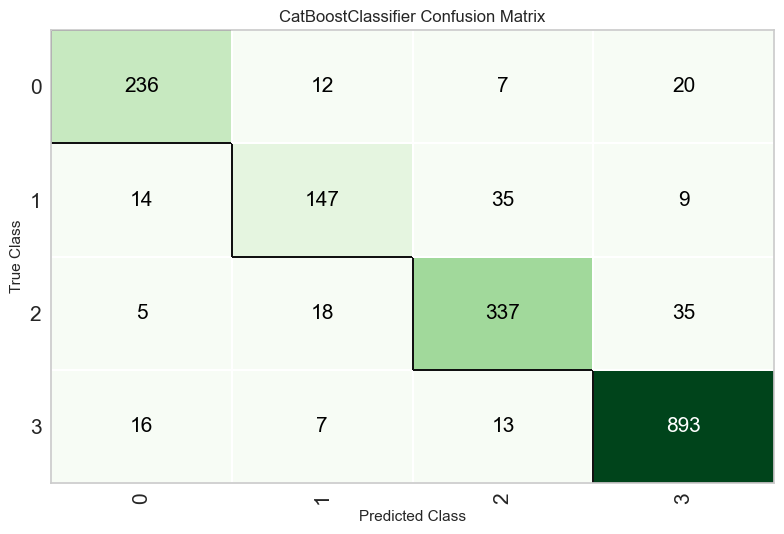

In [8]:
plot_model(best, plot = 'confusion_matrix')

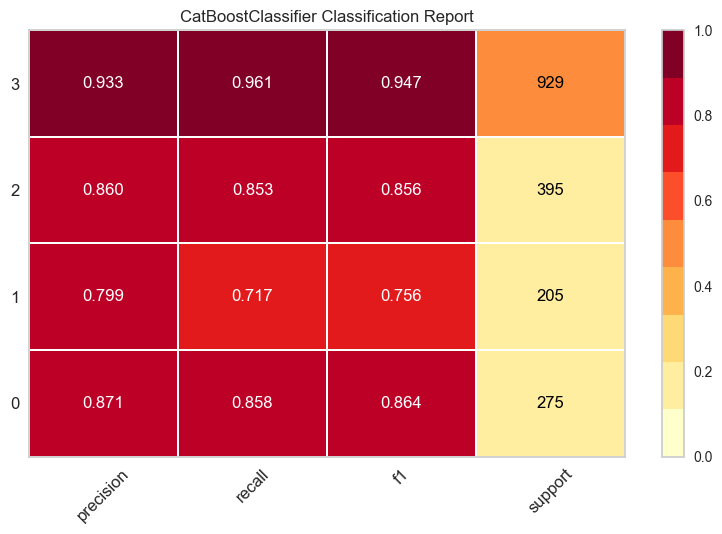

In [10]:
plot_model(best, plot = 'class_report')

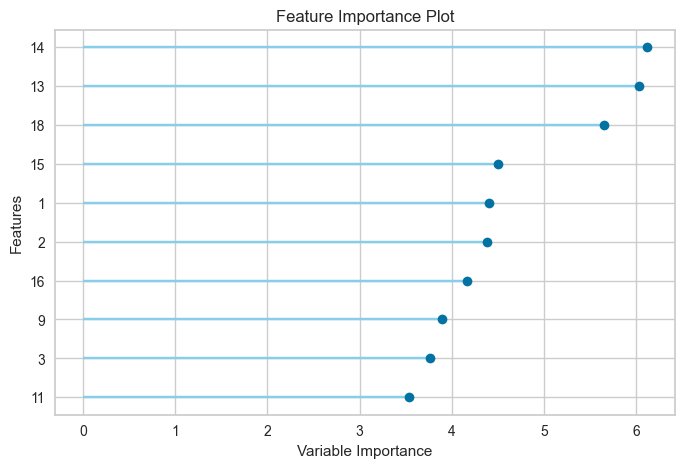

In [9]:
plot_model(best, plot = 'feature')

Se podrían optimizar los features, inicialmente se trabajó con 13 MFCC. Ahora con 50, es evidente que el modelo utiliza mucha información de coeficientes altos. Razón que explica la mejora del desempeño al incrementar la cantidad de coeficientes. 

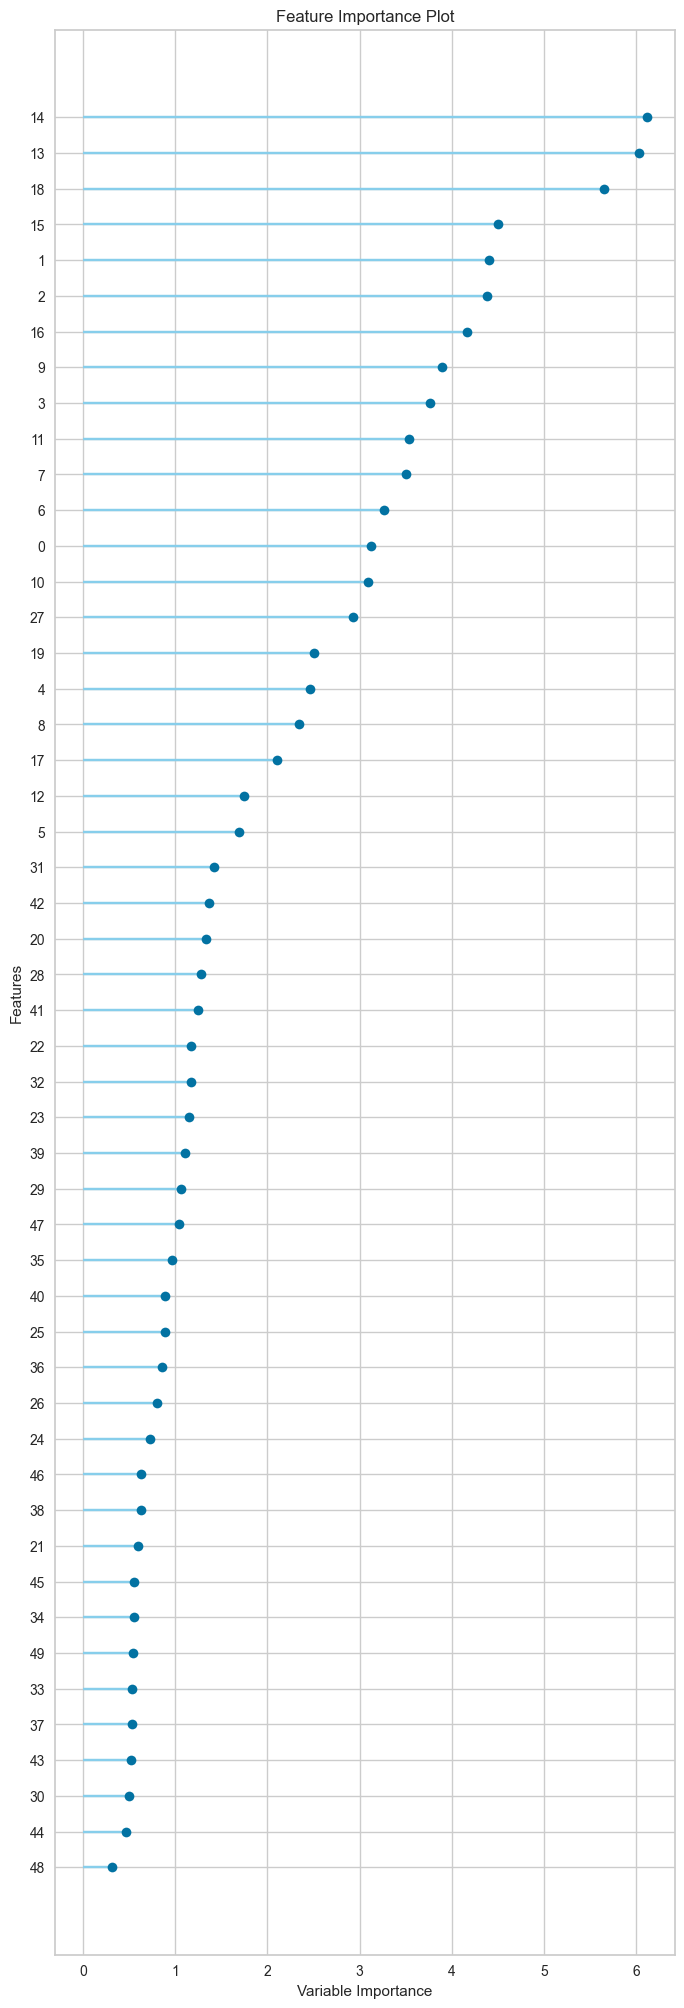

In [14]:
plot_model(best, plot = 'feature_all')

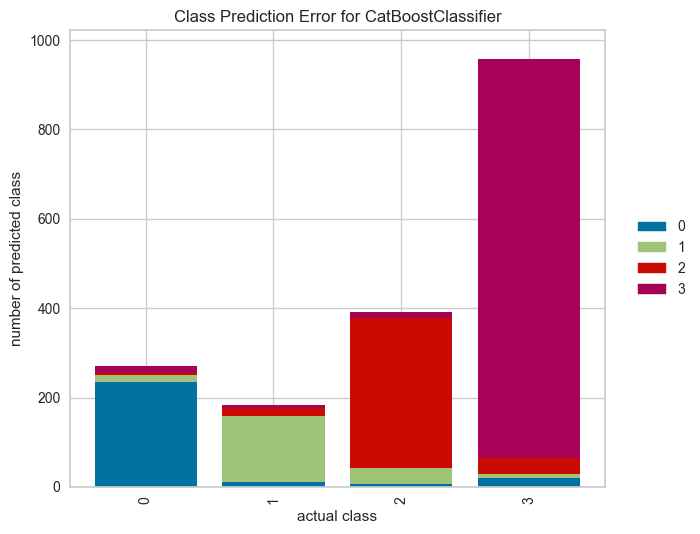

In [17]:
plot_model(best, plot = 'error')

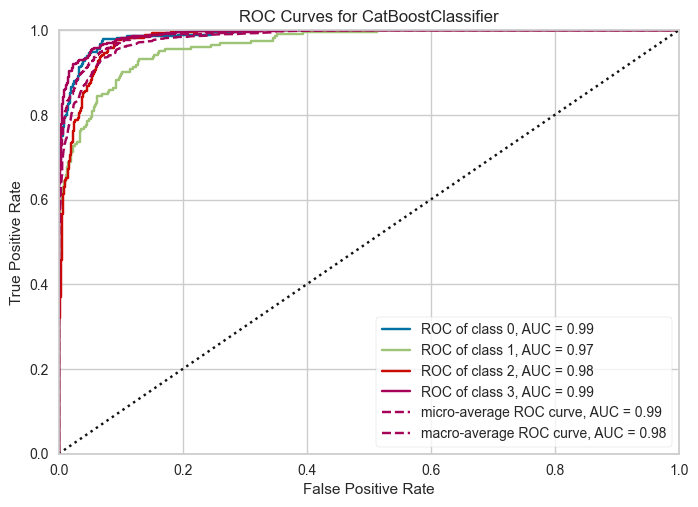

In [15]:
plot_model(best, plot = 'auc')

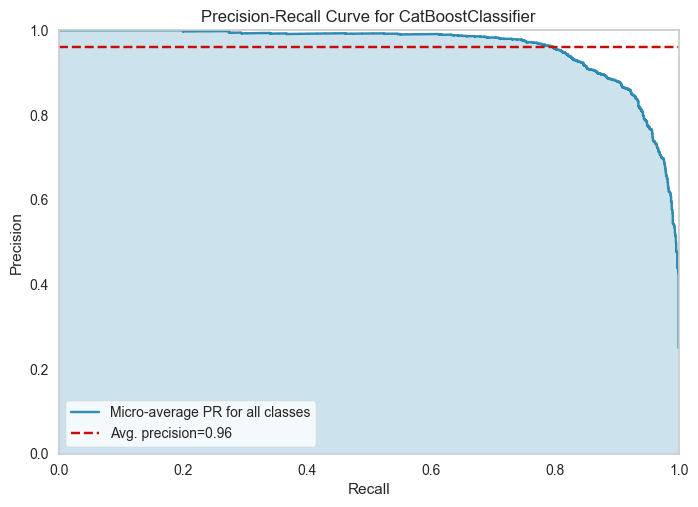

In [19]:
plot_model(best, plot = 'pr')

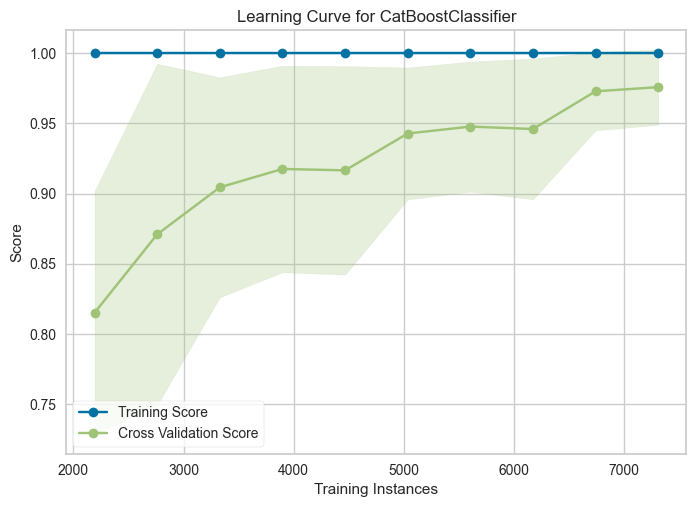

In [23]:
plot_model(best, plot = 'learning')

Con "más datos"... podríamos mejorar el desempeño.
Por el momento, y a corto plazo, podríamos procesar segmentos más cortos con los datos disponibles. Ya que nos quedamos con la media de los MFCC.

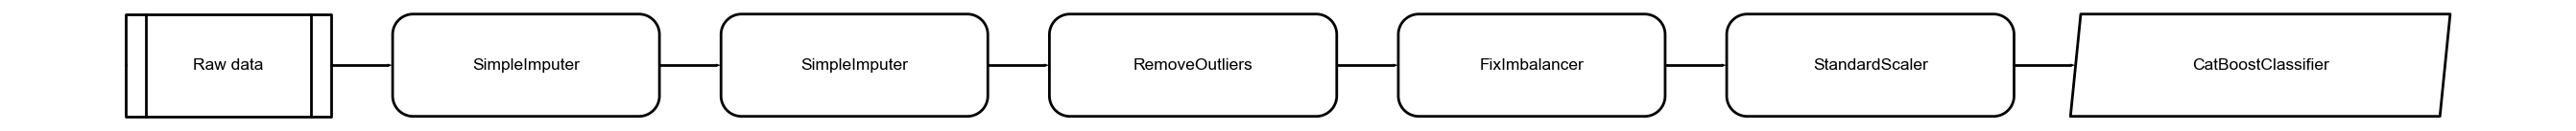

In [18]:
plot_model(best, plot = 'pipeline') 

In [24]:
pipeline_auto = get_config('pipeline')  # Todo el pipeline de preprocesamiento
pipeline_auto

Pipeline(memory=FastMemory(location=C:\Users\Axel\AppData\Local\Temp\joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['0', '1', '2', '3', '4', '5', '6',
                                             '7', '8', '9', '10', '11', '12',
                                             '13', '14', '15', '16', '17', '18',
                                             '19', '20', '21', '22', '23', '24',
                                             '25', '26', '27', '28', '29', ...],
                                    transformer=SimpleImputer(add_indicator=False,
                                                              copy=True,
                                                              fil...
                                                               n_jobs=1,
                                                               random_state=123,
                                                               threshold=0.05))),
                ('balance',
                 TransformerWrapper(exclude=None, include=None,
                                    transformer=FixImbalancer(estimator=SMOTE(k_neighbors=5,
                                                                              n_jobs=None,
                                                                              random_state=123,
                                                                              sampling_strategy='auto')))),
                ('normalize',
                 TransformerWrapper(exclude=None, include=None,
                                    transformer=StandardScaler(copy=True,
                                                               with_mean=True,
                                                               with_std=True)))],
         verbose=False)

In [11]:
plot_model(best, plot = 'parameter')    # Hiperparámetros del modelo base...

,Parameters
nan_mode,Min
eval_metric,MultiClass
iterations,1000
sampling_frequency,PerTree
leaf_estimation_method,Newton
random_score_type,NormalWithModelSizeDecrease
grow_policy,SymmetricTree
penalties_coefficient,1
boosting_type,Plain
model_shrink_mode,Constant


In [25]:
save_model(best, 'best_model')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['0', '1', '2', '3', '4', '5', '6',
                                              '7', '8', '9', '10', '11', '12',
                                              '13', '14', '15', '16', '17', '18',
                                              '19', '20', '21', '22', '23', '24',
                                              '25', '26', '27', '28', '29', ...],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep_empty_features=False,...
                  TransformerWrapper(exclude=None, include=None,
                                     transformer=FixImbalancer(estim

## Ajuste de Hiperparámetros

In [26]:
tuned_modelo = tune_model(best) # Intento de optimización de hiperparámetros

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6930,0.9211,0.6930,0.7496,0.6877,0.5599,0.5902
1,0.8082,0.9655,0.8082,0.8392,0.8016,0.7169,0.7363
2,0.9209,0.9873,0.9209,0.9340,0.9210,0.8816,0.8850
3,0.9616,0.9967,0.9616,0.9623,0.9603,0.9410,0.9419
4,0.8945,0.9924,0.8945,0.8977,0.8866,0.8346,0.8396
5,0.8945,0.9891,0.8945,0.9017,0.8952,0.8388,0.8407
6,0.8441,0.9939,0.8441,0.8695,0.8303,0.7524,0.7722
7,0.7698,0.9538,0.7698,0.7911,0.7634,0.6521,0.6628
8,0.7194,0.9326,0.7194,0.7046,0.6961,0.5570,0.5682


Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [27]:
tuned_modelo = tune_model(best, optimize = 'F1')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6930,0.9211,0.6930,0.7496,0.6877,0.5599,0.5902
1,0.8082,0.9655,0.8082,0.8392,0.8016,0.7169,0.7363
2,0.9209,0.9873,0.9209,0.9340,0.9210,0.8816,0.8850
3,0.9616,0.9967,0.9616,0.9623,0.9603,0.9410,0.9419
4,0.8945,0.9924,0.8945,0.8977,0.8866,0.8346,0.8396
5,0.8945,0.9891,0.8945,0.9017,0.8952,0.8388,0.8407
6,0.8441,0.9939,0.8441,0.8695,0.8303,0.7524,0.7722
7,0.7698,0.9538,0.7698,0.7911,0.7634,0.6521,0.6628
8,0.7194,0.9326,0.7194,0.7046,0.6961,0.5570,0.5682


Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [28]:
tuned_modelo = tune_model(best, search_library = 'optuna')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7146,0.9258,0.7146,0.7696,0.7124,0.5877,0.6159
1,0.8034,0.9723,0.8034,0.8510,0.7991,0.7099,0.7342
2,0.8921,0.9842,0.8921,0.9119,0.8950,0.8398,0.8444
3,0.9544,0.9927,0.9544,0.9547,0.9523,0.9297,0.9310
4,0.9113,0.9914,0.9113,0.9122,0.9056,0.8616,0.8649
5,0.8993,0.9862,0.8993,0.8987,0.8974,0.8441,0.8458
6,0.8441,0.9924,0.8441,0.8698,0.8336,0.7582,0.7723
7,0.6835,0.9291,0.6835,0.7244,0.6689,0.5210,0.5409
8,0.7074,0.9227,0.7074,0.7046,0.6861,0.5405,0.5529


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


Al parecer, el modelo actual ya supera a las grillas de exploración de los optimizadores...

## Ensamblados

In [7]:
best_f1_models_top3 = compare_models(sort = 'F1', n_select = 3)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
catboost,CatBoost Classifier,0.8469,0.9704,0.8469,0.8617,0.8418,0.7672,0.7768,4.4240
lightgbm,Light Gradient Boosting Machine,0.8400,0.9662,0.8400,0.8529,0.8332,0.7537,0.7640,0.5070
xgboost,Extreme Gradient Boosting,0.8364,0.9677,0.8364,0.8510,0.8301,0.7487,0.7593,0.3030
rf,Random Forest Classifier,0.8232,0.9650,0.8232,0.8401,0.8125,0.7248,0.7387,0.1990
gbc,Gradient Boosting Classifier,0.8069,0.0000,0.8069,0.8254,0.8021,0.7068,0.7175,4.8700
et,Extra Trees Classifier,0.8131,0.9649,0.8131,0.8285,0.7976,0.7059,0.7229,0.0700
qda,Quadratic Discriminant Analysis,0.8073,0.0000,0.8073,0.8383,0.7882,0.6962,0.7162,0.0230
svm,SVM - Linear Kernel,0.7910,0.0000,0.7910,0.8139,0.7872,0.6888,0.6975,0.0310
knn,K Neighbors Classifier,0.7803,0.9078,0.7803,0.8261,0.7837,0.6788,0.6923,0.2010
lr,Logistic Regression,0.7843,0.0000,0.7843,0.8123,0.7836,0.6809,0.6893,0.2470


In [30]:
best_f1_models_top3

 LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
                importance_type='split', learning_rate=0.1, max_depth=-1,
                min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
                n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
                random_state=123, reg_alpha=0.0, reg_lambda=0.0, subsample=1.0,
                subsample_for_bin=200000, subsample_freq=0),
 XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
               colsample_bylevel=None, colsample_bynode=None,
               colsample_bytree=None, device='cpu', early_stopping_rounds=None,
               enable_categorical=False, eval_metric=None, feature_types=None,
               gamma=None, grow_policy=None, importance_type=None,
               interaction_constraints=None, learning_rate=None, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=None, 

### Bagging

In [31]:
ensemble_model(best, method = 'Bagging') # El mejor modelo ya es una implementación de boosting, pero bueno... no se pierde nada al indagar empíricamente

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7098,0.9270,0.7098,0.7753,0.7045,0.5846,0.6205
1,0.8225,0.9682,0.8225,0.8483,0.8132,0.7355,0.7540
2,0.9400,0.9863,0.9400,0.9490,0.9390,0.9098,0.9123
3,0.9664,0.9975,0.9664,0.9666,0.9654,0.9484,0.9491
4,0.9329,0.9950,0.9329,0.9339,0.9288,0.8958,0.8981
5,0.9017,0.9916,0.9017,0.9039,0.9007,0.8485,0.8504
6,0.8657,0.9963,0.8657,0.8885,0.8568,0.7887,0.8034
7,0.8010,0.9710,0.8010,0.8298,0.8003,0.6981,0.7072
8,0.7530,0.9445,0.7530,0.7488,0.7385,0.6149,0.6232


BaggingClassifier(bootstrap=True, bootstrap_features=False,
                  estimator=<catboost.core.CatBoostClassifier object at 0x000001737D0A52D0>,
                  max_features=1.0, max_samples=1.0, n_estimators=10,
                  n_jobs=None, oob_score=False, random_state=123, verbose=0,
                  warm_start=False)

### Boosting

In [32]:
ensemble_model(best, method = 'Boosting')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7146,0.0000,0.7146,0.7793,0.7112,0.5895,0.6238
1,0.8177,0.0000,0.8177,0.8518,0.8040,0.7272,0.7500
2,0.9329,0.0000,0.9329,0.9440,0.9307,0.8987,0.9019
3,0.9664,0.0000,0.9664,0.9667,0.9652,0.9483,0.9492
4,0.9257,0.0000,0.9257,0.9264,0.9211,0.8845,0.8871
5,0.8969,0.0000,0.8969,0.8997,0.8960,0.8410,0.8430
6,0.8657,0.0000,0.8657,0.8862,0.8567,0.7884,0.8030
7,0.8106,0.0000,0.8106,0.8410,0.8084,0.7116,0.7216
8,0.7554,0.0000,0.7554,0.7481,0.7388,0.6173,0.6261


AdaBoostClassifier(algorithm='SAMME.R',
                   estimator=<catboost.core.CatBoostClassifier object at 0x000001739FB4E770>,
                   learning_rate=1.0, n_estimators=10, random_state=123)

### Mezcla (*Blend Models*)

In [33]:
blend_models(best_f1_models_top3)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7290,0.9297,0.7290,0.7924,0.7262,0.6070,0.6415
1,0.8489,0.9716,0.8489,0.8811,0.8462,0.7745,0.7899
2,0.9424,0.9890,0.9424,0.9480,0.9416,0.9130,0.9146
3,0.9544,0.9971,0.9544,0.9551,0.9520,0.9295,0.9312
4,0.9305,0.9943,0.9305,0.9319,0.9249,0.8918,0.8948
5,0.9041,0.9921,0.9041,0.9052,0.9022,0.8512,0.8537
6,0.8825,0.9957,0.8825,0.8997,0.8779,0.8132,0.8263
7,0.8201,0.9685,0.8201,0.8471,0.8165,0.7240,0.7333
8,0.7338,0.9446,0.7338,0.7264,0.7109,0.5779,0.5913


VotingClassifier(estimators=[('CatBoost Classifier',
                              <catboost.core.CatBoostClassifier object at 0x000001730DD03C10>),
                             ('Light Gradient Boosting Machine',
                              LGBMClassifier(boosting_type='gbdt',
                                             class_weight=None,
                                             colsample_bytree=1.0,
                                             importance_type='split',
                                             learning_rate=0.1, max_depth=-1,
                                             min_child_samples=20,
                                             min_child_weight=0.001,
                                             min_split_gain=0.0,
                                             n_estimators...
                                            learning_rate=None, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=None,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=None, n_jobs=-1,
                                            num_parallel_tree=None,
                                            objective='multi:softprob', ...))],
                 flatten_transform=True, n_jobs=-1, verbose=False,
                 voting='soft', weights=None)

In [35]:
blend_models(best_f1_models_top3, method='hard') # Predicen clases distintas?

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
1,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
2,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
3,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
4,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
5,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
6,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
7,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
8,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000


VotingClassifier(estimators=[('CatBoost Classifier',
                              <catboost.core.CatBoostClassifier object at 0x000001739FC1D870>),
                             ('Light Gradient Boosting Machine',
                              LGBMClassifier(boosting_type='gbdt',
                                             class_weight=None,
                                             colsample_bytree=1.0,
                                             importance_type='split',
                                             learning_rate=0.1, max_depth=-1,
                                             min_child_samples=20,
                                             min_child_weight=0.001,
                                             min_split_gain=0.0,
                                             n_estimators...
                                            learning_rate=None, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=None,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=None, n_jobs=-1,
                                            num_parallel_tree=None,
                                            objective='multi:softprob', ...))],
                 flatten_transform=True, n_jobs=-1, verbose=False,
                 voting='hard', weights=None)

### Stacking

In [36]:
stack_models(best_f1_models_top3)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7554,0.0000,0.7554,0.7838,0.7444,0.6382,0.6629
1,0.8729,0.0000,0.8729,0.8975,0.8643,0.8076,0.8205
2,0.9424,0.0000,0.9424,0.9473,0.9399,0.9122,0.9140
3,0.9568,0.0000,0.9568,0.9603,0.9536,0.9328,0.9358
4,0.9185,0.0000,0.9185,0.9201,0.9118,0.8723,0.8764
5,0.8897,0.0000,0.8897,0.8922,0.8863,0.8267,0.8318
6,0.8465,0.0000,0.8465,0.8790,0.8399,0.7505,0.7745
7,0.8082,0.0000,0.8082,0.8343,0.7967,0.7009,0.7131
8,0.7242,0.0000,0.7242,0.7115,0.6943,0.5568,0.5738


StackingClassifier(cv=5,
                   estimators=[('CatBoost Classifier',
                                <catboost.core.CatBoostClassifier object at 0x000001739E693100>),
                               ('Light Gradient Boosting Machine',
                                LGBMClassifier(boosting_type='gbdt',
                                               class_weight=None,
                                               colsample_bytree=1.0,
                                               importance_type='split',
                                               learning_rate=0.1, max_depth=-1,
                                               min_child_samples=20,
                                               min_child_weight=0.001,
                                               min_split_gain=0.0,
                                               n_est...
                                              num_parallel_tree=None,
                                              objective='multi:softprob', ...))],
                   final_estimator=LogisticRegression(C=1.0, class_weight=None,
                                                      dual=False,
                                                      fit_intercept=True,
                                                      intercept_scaling=1,
                                                      l1_ratio=None,
                                                      max_iter=1000,
                                                      multi_class='auto',
                                                      n_jobs=None, penalty='l2',
                                                      random_state=123,
                                                      solver='lbfgs',
                                                      tol=0.0001, verbose=0,
                                                      warm_start=False),
                   n_jobs=-1, passthrough=False, stack_method='auto',
                   verbose=0)

El modelo base es mejor que cualquier ensamblado. Se podría encadenar una optimización de todo esto si amerita una pequeña mejora frente a un alto costo de procesamiento.
Lo óptimo sería ir a deep learning directamente...

## Interpretabilidad de Modelos

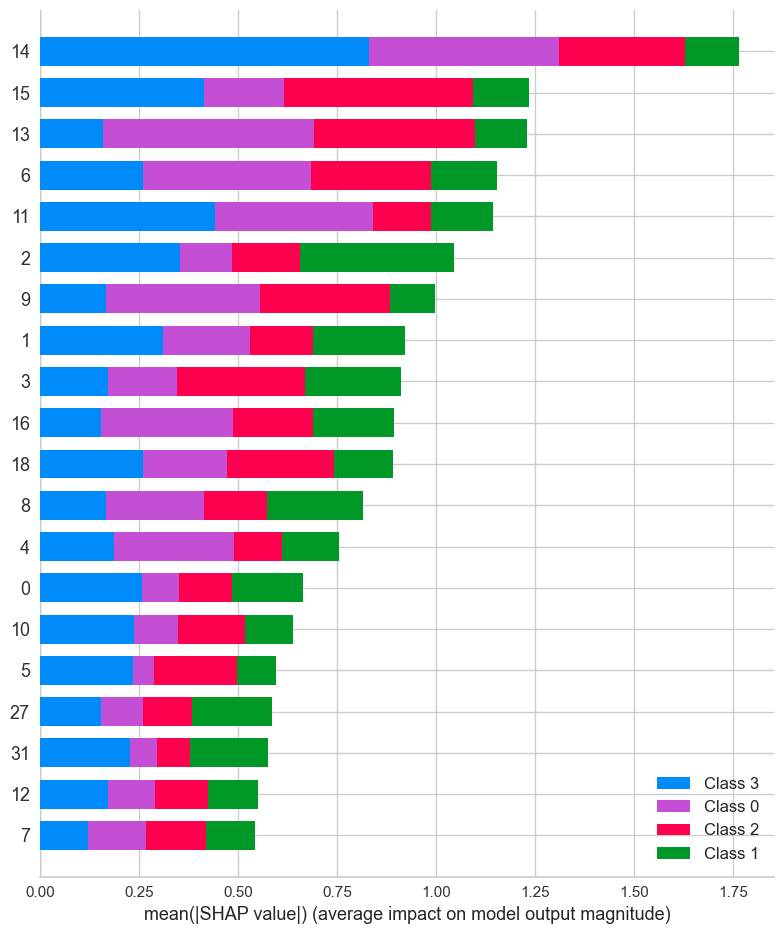

In [37]:
interpret_model(best, plot = 'summary')